## 知識情報学第11回演習サンプルプログラム ex11.ipynb
- Last updated: 2016/11/18
- Checked with Python 3.8, scikit-learn 1.3, somoclu 1.7.4
- MIT Lisence

## SOM学習によるglassデータの可視化
- somocluのAPIリファレンスは下記を参照
  - https://somoclu.readthedocs.io/en/stable/
  - Windows: エラーが出る場合は1.7.4に落としてみると良い
  - Mac: pip ではなく，conda install somoclu でインストールすると良い
  - ローカルで動かない場合はGoogle Colaboratory を推奨
     - https://colab.research.google.com
     - glassデータは別途アップロードすること

### 【課題1】SOM学習結果をU-matrixおよびComponent Planesにより可視化しなさい．
-  ヒント：view_umatrix()およびview_component_planes()を使用する

### 【課題2】可視化結果からglassデータについて分析しなさい．
- クラス毎の特徴，クラス間の類似性に着目すると良い

In [2]:
!pip install somoclu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for somoclu: filename=somoclu-1.7.6-cp310-cp310-linux_x86_64.whl size=595706 sha256=1c36f0afa58998a32f777ace0e196fe7acb7d29d69e9bb1a90809456693bd39c
  Stored in directory: /root/.cache/pip/wheels/59/c3/65/d78959b2e432af6e863523efe8d1faa21111c1cc7fd4e04436
Successfully built somoclu


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
import somoclu
import os

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
base_path = '/content/gdrive/My Drive/Colab Notebooks/study/知識情報学'

Mounted at /content/gdrive


### glassデータの読み込み
- pandasのread_csvを利用

In [7]:
glass_data = os.path.join(base_path, "glass.data")
df_glass = pd.read_csv(glass_data, header=None)
df_glass.columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

X = df_glass[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']].values
X_std = np.float32(scale(X))
y = df_glass['Type'].values

n_feature = X.shape[1]
n_class = max(df_glass['Type'].values)

### SOM学習

In [8]:
som = somoclu.Somoclu(n_rows=10, n_columns=15, initialization="pca",  gridtype='rectangular')
som.train(data=X_std, epochs=200)

## 考察
- データ全体の可視化結果では、特定のデータが特定の箇所に集中して分布しており、特徴量に基づいてうまくデータの分類が出来そうだと言える。例えば特徴量のindex1はラベル7に強く相関していることが見て取れる。一方で、特徴量index6などは広範に分布しており、labelの分類にあまり役立ちそうにない

### U-matrix表示

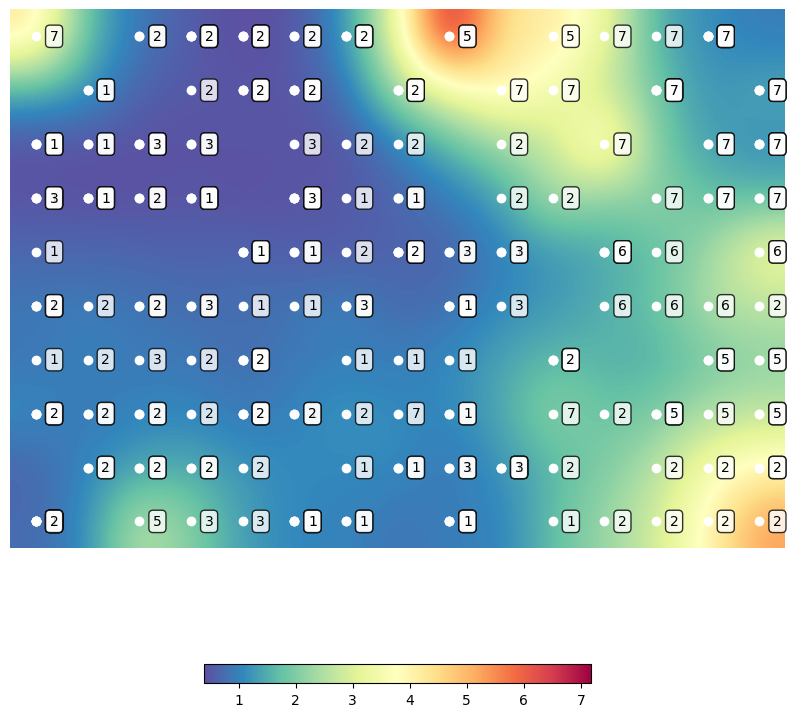

In [12]:
win_map = som.get_surface_state()

som.view_umatrix(bestmatches=True, colorbar=True, figsize=(10, 10), labels=y)
plt.show()

### 各特徴量の分布（Component Planes）


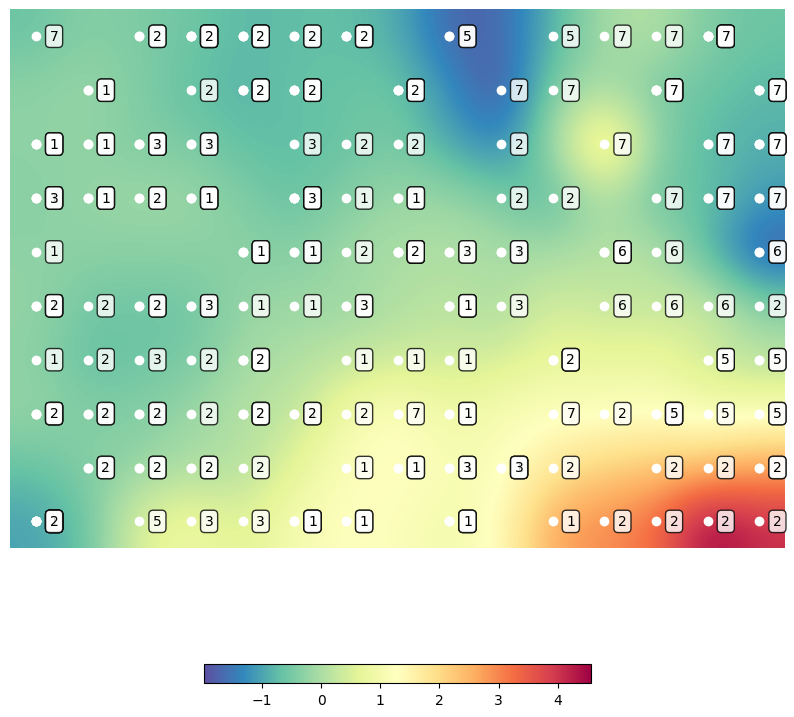

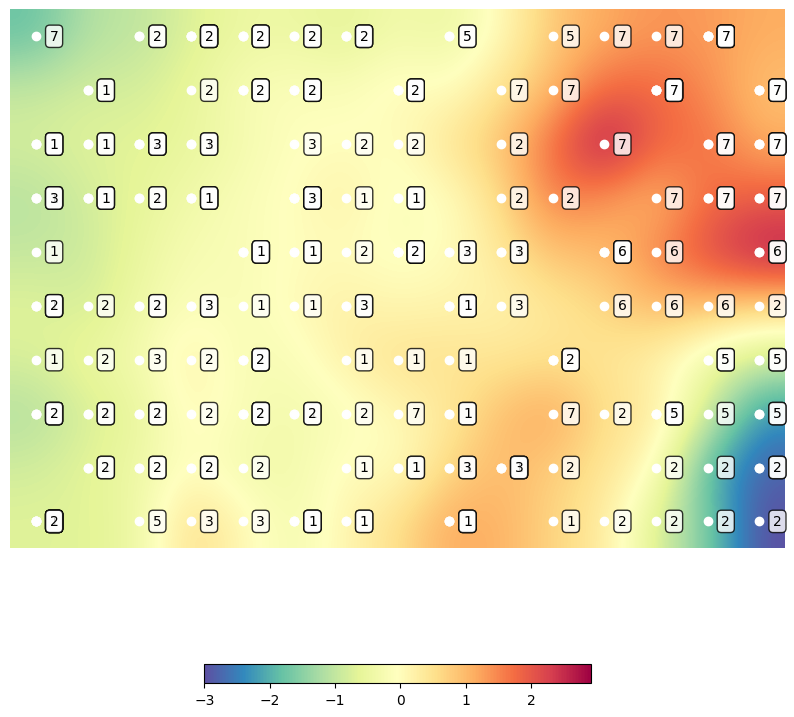

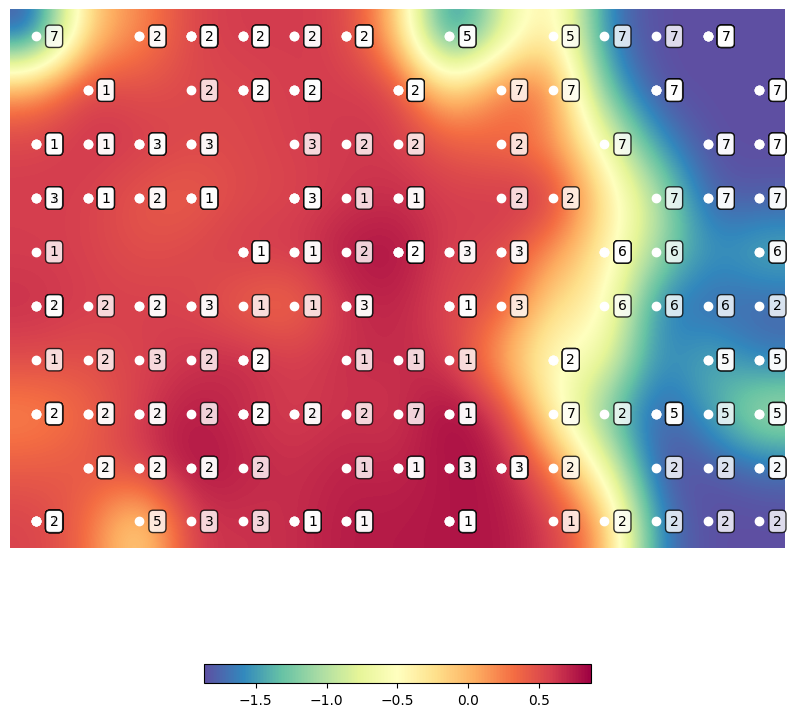

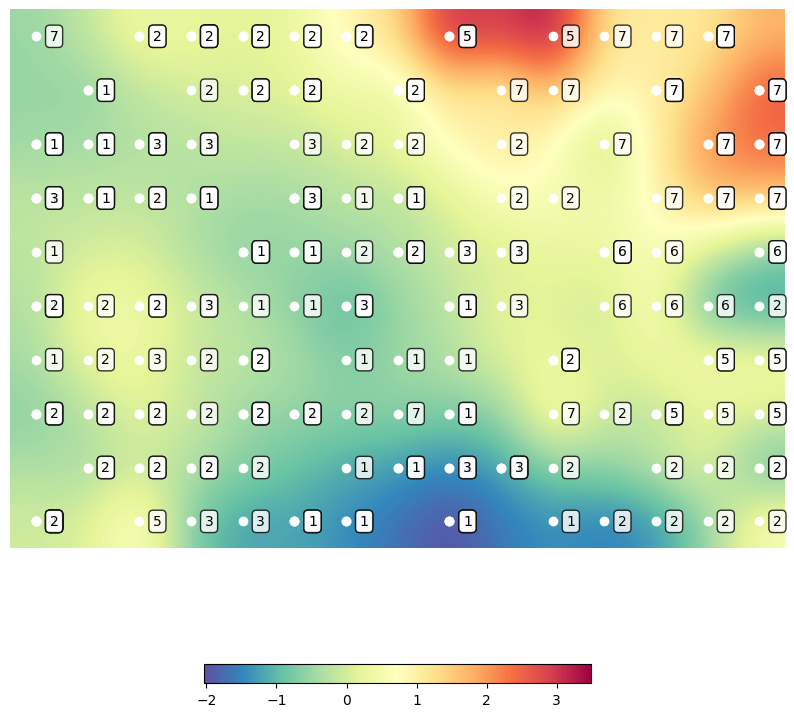

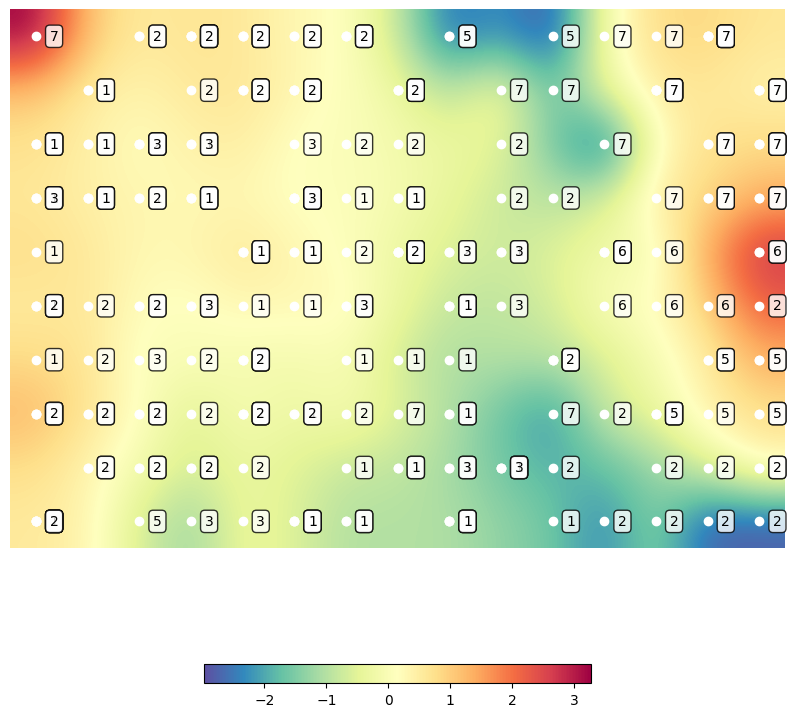

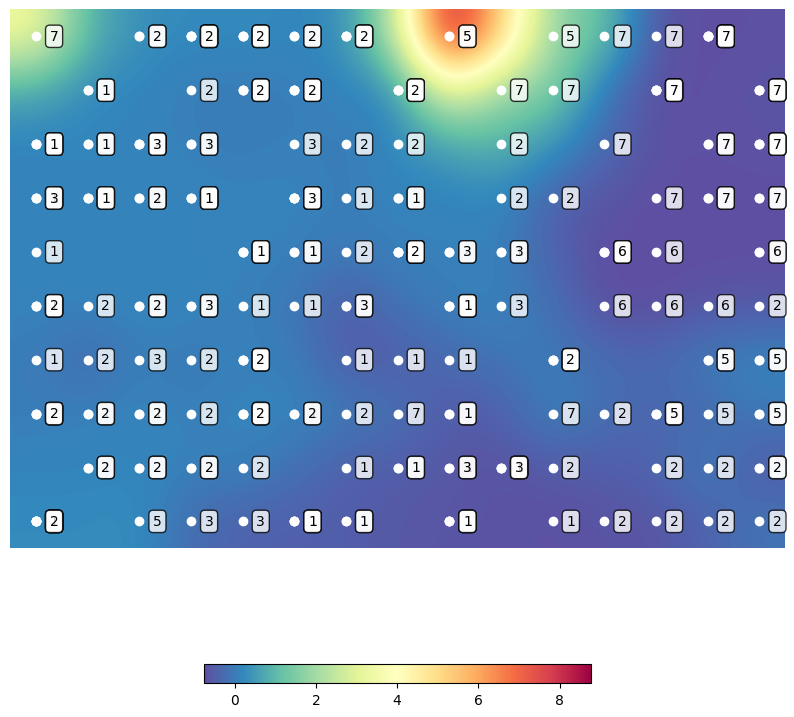

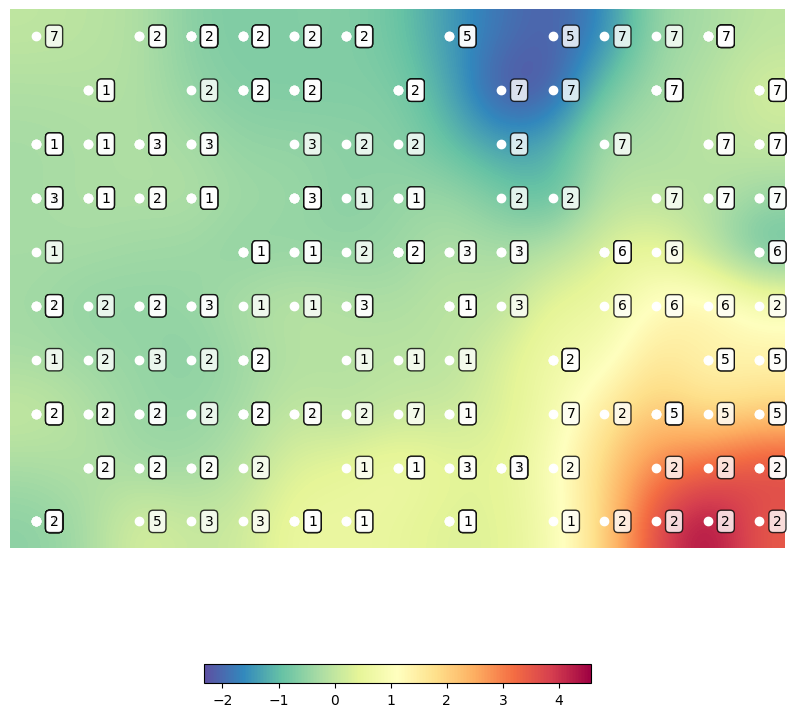

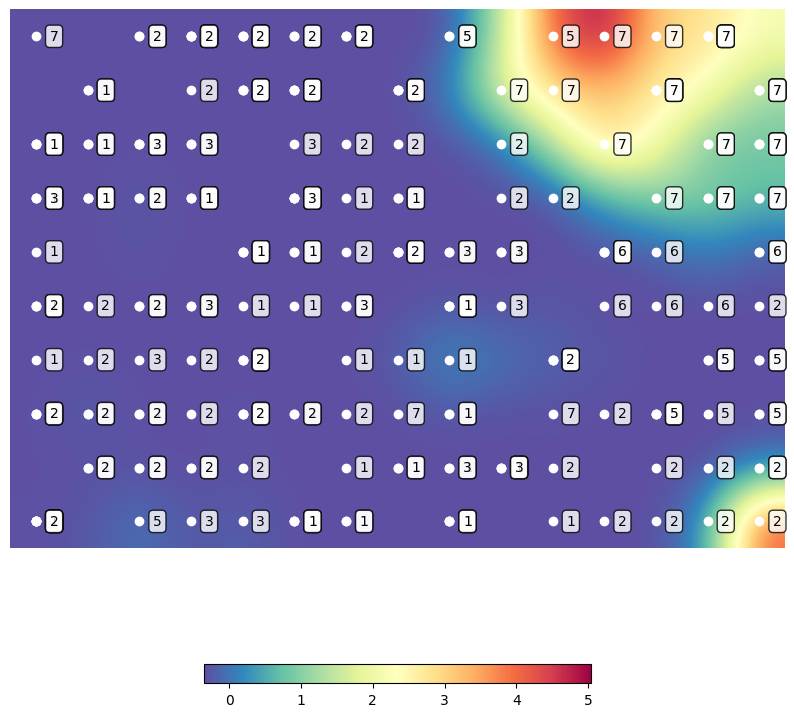

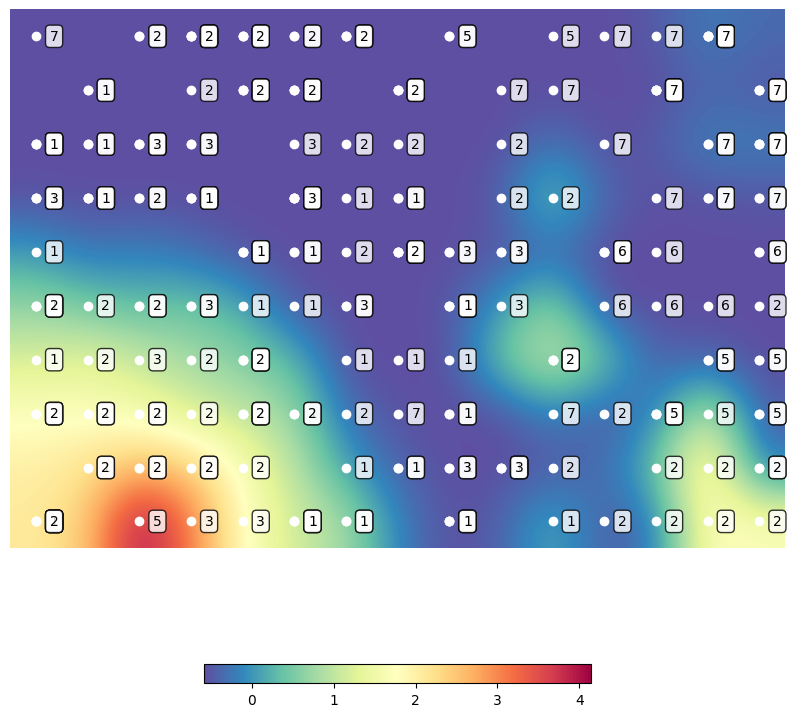

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [35]:
som.view_component_planes(bestmatches=True, colorbar=True, figsize=(10, 10), labels=y)